In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
dwelling_detail = pd.read_csv('/Users/nidhitrivedi/Downloads/Housing.csv')

In [3]:
dwelling_detail.head(5)

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,NFAMS,NCOUPLES,PERNUM,PERWT,AGE,MARST,BIRTHYR,EDUC,EDUCD,INCTOT
0,1371772,920.0,1,13,9990,9993,360,9993,75000,700000,...,1,0,1,14,52,6,1969,7,71,75000
1,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,2,0,1,83,22,6,1999,10,101,5600
2,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,2,0,2,106,22,6,1999,7,71,8000
3,1371774,22.5,1,13,600,9993,9993,9993,7000,800000,...,1,0,1,33,62,4,1959,6,63,7000
4,1371775,3710.4,2,22,3600,9993,9997,9993,50500,9999999,...,1,0,1,297,50,3,1971,7,71,16000


In [4]:
dwelling_detail.columns

Index(['SERIAL', 'DENSITY', 'OWNERSHP', 'OWNERSHPD', 'COSTELEC', 'COSTGAS',
       'COSTWATR', 'COSTFUEL', 'HHINCOME', 'VALUEH', 'ROOMS', 'BUILTYR2',
       'BEDROOMS', 'VEHICLES', 'NFAMS', 'NCOUPLES', 'PERNUM', 'PERWT', 'AGE',
       'MARST', 'BIRTHYR', 'EDUC', 'EDUCD', 'INCTOT'],
      dtype='object')

In [5]:
dwelling_detail.shape

(75388, 24)

In [6]:
unique_value_counts = dwelling_detail.nunique()

print("Number of unique values:")
print(unique_value_counts)

Number of unique values:
SERIAL       30802
DENSITY         56
OWNERSHP         2
OWNERSHPD        4
COSTELEC        59
COSTGAS         40
COSTWATR       133
COSTFUEL       109
HHINCOME      5717
VALUEH         796
ROOMS           15
BUILTYR2        11
BEDROOMS         7
VEHICLES         7
NFAMS           10
NCOUPLES         4
PERNUM          16
PERWT          626
AGE             91
MARST            6
BIRTHYR         91
EDUC            11
EDUCD           25
INCTOT        4300
dtype: int64


In [7]:
dwelling_detail = dwelling_detail.loc[dwelling_detail.groupby('SERIAL')['AGE'].idxmax()]


In [8]:
dwelling_detail.shape


(30802, 24)

In [9]:
dwelling_detail.head(5)

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,NFAMS,NCOUPLES,PERNUM,PERWT,AGE,MARST,BIRTHYR,EDUC,EDUCD,INCTOT
0,1371772,920.0,1,13,9990,9993,360,9993,75000,700000,...,1,0,1,14,52,6,1969,7,71,75000
1,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,2,0,1,83,22,6,1999,10,101,5600
3,1371774,22.5,1,13,600,9993,9993,9993,7000,800000,...,1,0,1,33,62,4,1959,6,63,7000
4,1371775,3710.4,2,22,3600,9993,9997,9993,50500,9999999,...,1,0,1,297,50,3,1971,7,71,16000
7,1371776,448.2,1,12,1560,3000,9993,9993,155300,850000,...,1,1,2,10,93,1,1928,10,101,89800


In [10]:
#dropping the unnecessary columns
required_columns = ['DENSITY', 'OWNERSHP', 'HHINCOME', 'ROOMS',
                    'BEDROOMS', 'VEHICLES', 'NFAMS', 'NCOUPLES', 'AGE', 'MARST', 'EDUC']

dwelling_detail_selected = dwelling_detail[required_columns]

dwelling_detail_selected.head(5)

,DENSITY,OWNERSHP,HHINCOME,ROOMS,BEDROOMS,VEHICLES,NFAMS,NCOUPLES,AGE,MARST,EDUC
0,920.0,1,75000,7,4,2,1,0,52,6,7
1,3640.9,2,13600,6,4,2,2,0,22,6,10
3,22.5,1,7000,5,4,2,1,0,62,4,6
4,3710.4,2,50500,4,3,2,1,0,50,3,7
7,448.2,1,155300,5,4,2,1,1,93,1,10


In [11]:
dwelling_detail_selected.shape

(30802, 11)

In [12]:
max_hhincome = dwelling_detail_selected['HHINCOME'].max()
max_rooms = dwelling_detail_selected['ROOMS'].max()
max_BEDROOMS = dwelling_detail_selected['BEDROOMS'].max()
max_VEHICLES = dwelling_detail_selected['VEHICLES'].max()
max_NFAMS = dwelling_detail_selected['NFAMS'].max()
max_ncouples = dwelling_detail_selected['NCOUPLES'].max()
max_density = dwelling_detail_selected['DENSITY'].max()


print("Maximum value of HHINCOME:", max_hhincome)
print("Maximum value of max_rooms:", max_rooms)
print("Maximum value of max_BEDROOMS:", max_BEDROOMS)
print("Maximum value of max_VEHICLES:", max_VEHICLES)
print("Maximum value of max_NFAMS:", max_NFAMS)
print("Maximum value of max_ncouples:", max_ncouples)
print("Maximum value of max_density:", max_density)

Maximum value of HHINCOME: 1674500
Maximum value of max_rooms: 17
Maximum value of max_BEDROOMS: 8
Maximum value of max_VEHICLES: 9
Maximum value of max_NFAMS: 13
Maximum value of max_ncouples: 3
Maximum value of max_density: 13284.6


In [13]:
dwelling_detail_selected['HHINCOME'] = [0 if value >= -7100 and value <= 50000 else
                                             (1 if value > 50000 and value <= 100000 else
                                              (2 if value > 100000 and value <= 300000 else 3))
                                             for value in dwelling_detail_selected['HHINCOME']]
print(dwelling_detail_selected['HHINCOME'].value_counts())
#youth_data['alcflag'].value_counts()


# dwelling_detail_selected['VEHICLES'] = [0 if value == 9 else
#                                         (1 if value > 0 and value <= 3 else 
#                                          (2 if value > 4 and value <= 7 else 3))
#                                         for value in dwelling_detail_selected['VEHICLES']]
# print(dwelling_detail_selected['VEHICLES'].value_counts())

dwelling_detail_selected['MARRIED'] = (dwelling_detail_selected['MARST'] <= 2).astype(int)
dwelling_detail_selected['DIVORCED'] = dwelling_detail_selected['MARST'].between(2, 5).astype(int)
dwelling_detail_selected['UNMARRIED'] = (dwelling_detail_selected['MARST'] > 4).astype(int)


dwelling_detail_selected['EDUC_SCHOOL'] = (dwelling_detail_selected['EDUC'] <= 6).astype(int)
dwelling_detail_selected['EDUC_CLG'] = (dwelling_detail_selected['EDUC'] >6).astype(int)

dwelling_detail_selected['DENSITY'] = [0 if value >= 0 and value <= 1000 else
                                             (1 if value >1000 and value <= 3000 else
                                              (2 if value >3000 and value <= 7000 else 3))
                                             for value in dwelling_detail_selected['DENSITY']]
print(dwelling_detail_selected['DENSITY'].value_counts())



2    10918
0     9263
1     8816
3     1805
Name: HHINCOME, dtype: int64
0    13024
2     8761
1     6766
3     2251
Name: DENSITY, dtype: int64


/var/folders/_w/ydn_520j72v6hfgc1zdhcqp40000gn/T/ipykernel_1119/1221001112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dwelling_detail_selected['HHINCOME'] = [0 if value >= -7100 and value <= 50000 else
/var/folders/_w/ydn_520j72v6hfgc1zdhcqp40000gn/T/ipykernel_1119/1221001112.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dwelling_detail_selected['MARRIED'] = (dwelling_detail_selected['MARST'] <= 2).astype(int)
/var/folders/_w/ydn_520j72v6hfgc1zdhcqp40000gn/T/ipykernel_1119/1221001112.py:16: 

In [14]:
dwelling_detail_selected.head(5)

,DENSITY,OWNERSHP,HHINCOME,ROOMS,BEDROOMS,VEHICLES,NFAMS,NCOUPLES,AGE,MARST,EDUC,MARRIED,DIVORCED,UNMARRIED,EDUC_SCHOOL,EDUC_CLG
0,0,1,1,7,4,2,1,0,52,6,7,0,0,1,0,1
1,2,2,0,6,4,2,2,0,22,6,10,0,0,1,0,1
3,0,1,0,5,4,2,1,0,62,4,6,0,1,0,1,0
4,2,2,1,4,3,2,1,0,50,3,7,0,1,0,0,1
7,0,1,2,5,4,2,1,1,93,1,10,1,0,0,0,1


In [15]:
dwelling_detail_selected.shape

(30802, 16)

In [16]:
dwelling_detail_selected.columns

Index(['DENSITY', 'OWNERSHP', 'HHINCOME', 'ROOMS', 'BEDROOMS', 'VEHICLES',
       'NFAMS', 'NCOUPLES', 'AGE', 'MARST', 'EDUC', 'MARRIED', 'DIVORCED',
       'UNMARRIED', 'EDUC_SCHOOL', 'EDUC_CLG'],
      dtype='object')

will be creating subset of columns for linear analysis
For Linear model we will be considering 

In [17]:
required_columns = ['OWNERSHP', 'HHINCOME', 'DENSITY',
                    'BEDROOMS', 'NFAMS', 'AGE', 'MARRIED', 'EDUC_CLG']

dwelling_detail_linear = dwelling_detail_selected[required_columns]

dwelling_detail_linear.head(5)

,OWNERSHP,HHINCOME,DENSITY,BEDROOMS,NFAMS,AGE,MARRIED,EDUC_CLG
0,1,1,0,4,1,52,0,1
1,2,0,2,4,2,22,0,1
3,1,0,0,4,1,62,0,0
4,2,1,2,3,1,50,0,1
7,1,2,0,4,1,93,1,1


In [18]:
dwelling_detail_linear.shape

(30802, 8)

In [19]:
dwelling_detail_linear.columns

Index(['OWNERSHP', 'HHINCOME', 'DENSITY', 'BEDROOMS', 'NFAMS', 'AGE',
       'MARRIED', 'EDUC_CLG'],
      dtype='object')

this is our SVC linear model

In [20]:
X = dwelling_detail_linear.drop('OWNERSHP', axis=1)
y = dwelling_detail_linear['OWNERSHP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel="linear", C=0.4)
svm_linear.fit(X_train, y_train)

SVC(C=0.4, kernel='linear')

In [21]:
ypredict_linear = svm_linear.predict(X_test)
test_accuracy = accuracy_score(y_test, ypredict_linear)
print("Accuracy of svm linear model :", test_accuracy)

Accuracy of svm linear model : 0.8294108099334524


In [22]:
kfold_linear = skm.KFold(3, 
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.1,0.5,1,3,5,6]},
                        refit=True,
                        cv=kfold_linear,
                        scoring='accuracy');
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1}

In [23]:
svm_linear_best = SVC(kernel="linear", C=1)
svm_linear_best.fit(X_train, y_train)

ypredict_linear_best = svm_linear_best.predict(X_test)
test_accuracy_linear_best = accuracy_score(y_test, ypredict_linear_best)
print("Accuracy of svm linear best model :", test_accuracy_linear_best)


coeff = svm_linear_best.coef_
importance_scores = abs(coeff)
df_importance_feature = pd.DataFrame({'Features': X_train.columns, 'Score': importance_scores[0]})
df_importance_feature = df_importance_feature.sort_values(by='Score', ascending=False)
print(df_importance_feature)

Accuracy of svm linear best model : 0.8294108099334524
   Features     Score
2  BEDROOMS  0.744341
3     NFAMS  0.418559
5   MARRIED  0.358405
0  HHINCOME  0.356435
1   DENSITY  0.201169
6  EDUC_CLG  0.170958
4       AGE  0.030994


/Users/nidhitrivedi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


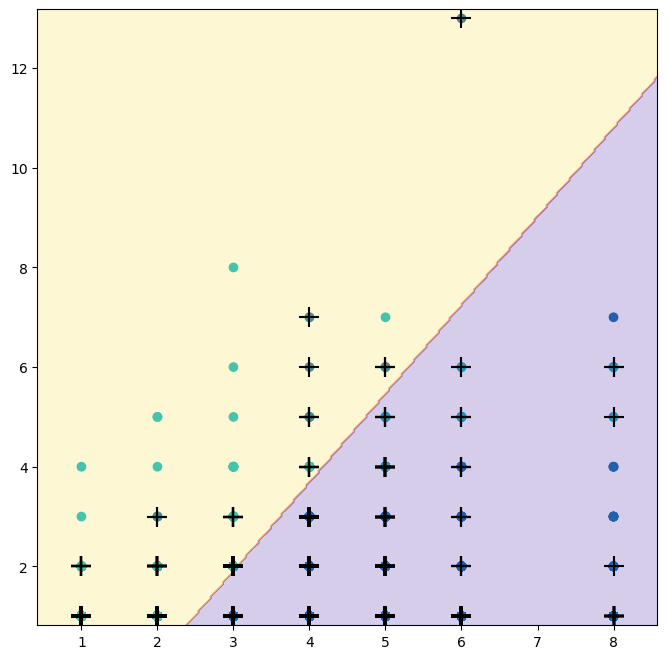

In [24]:

# svm_linear_best = svm_linear_best.fit(X_train[['AGE', 'NFAMS']], y_train)

# fig, ax = plt.subplots(figsize=(5, 5))
# plot_svm(X_train[['AGE', 'NFAMS']], y_train, svm_linear_best, ax=ax)
# plt.xlabel('AGE')
# plt.ylabel('NFAMS')
# plt.title('SVM Decision Boundary between Two Most Important Features')
# plt.show()


BEDROOMS = X_train.columns.get_loc('BEDROOMS')
NFAMS = X_train.columns.get_loc('NFAMS')
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,y_train,svm_linear_best,features=(BEDROOMS, NFAMS),ax=ax)
plt.xlabel('BEDROOMS')
plt.ylabel('NFAMS')
plt.title('SVM Decision Boundary between Two Most Important Features')
plt.show()

This is radial model

In [25]:
X = dwelling_detail_linear.drop('OWNERSHP', axis=1)
y = dwelling_detail_linear['OWNERSHP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_rbf = SVC(kernel="rbf", gamma=2, C=0.5)
svm_rbf.fit(X_train, y_train)

SVC(C=0.5, gamma=2)

In [26]:
ypredict_radial = svm_rbf.predict(X_test)
test_accuracy = accuracy_score(y_test, ypredict_radial)
print("Accuracy of radial model:", test_accuracy)

Accuracy of radial model: 0.7841259535789644


In [27]:
kfold_radial = skm.KFold(5, 
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
                        {'C':[0.1,1,5,7,10],
                         'gamma':[0.5,1,3,5]},
                        refit=True,
                        cv=kfold_radial,
                        scoring='accuracy');
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

The best param for this model is C = 1 and gamma = 0.5.

In [28]:
svm_radial_best = SVC(kernel="rbf", gamma=0.5, C=1)
svm_radial_best.fit(X_train, y_train)
ypredict_radial_best = svm_radial_best.predict(X_test)
test_accuracy_radial_best = accuracy_score(y_test, ypredict_radial_best)
print("Accuracy of radial best model:", test_accuracy_radial_best)



Accuracy of radial best model: 0.8279500081155656


In [29]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svm_radial_best, X_train, y_train, n_repeats=1, random_state=42)
importance_scores = perm_importance.importances_mean
df_importance_feature = pd.DataFrame({'Features': X_train.columns, 'Score': importance_scores})
df_importance_feature = df_importance_feature.sort_values(by='Score', ascending=False)
print(df_importance_feature)


   Features     Score
2  BEDROOMS  0.115296
4       AGE  0.092448
0  HHINCOME  0.037904
1   DENSITY  0.021996
5   MARRIED  0.009659
3     NFAMS  0.008482
6  EDUC_CLG  0.006737


/Users/nidhitrivedi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


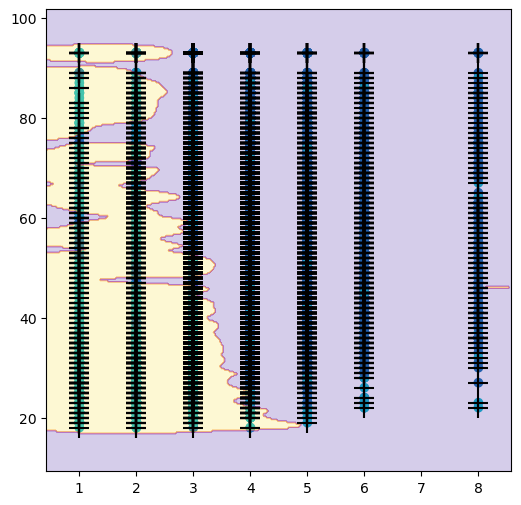

In [30]:


# top_features = df_importance_feature.iloc[:2]['Features'].tolist()
# svm_radial_best.fit(X_train[top_features], y_train)

# fig, ax = plt.subplots(figsize=(5, 5))
# plot_svm(X_train[top_features], y_train, svm_radial_best, ax=ax)
# plt.xlabel(top_features[0])
# plt.ylabel(top_features[1])
# plt.title('SVM Decision Boundary between Two Most Important Features')
# plt.show()


BEDROOMS = X_train.columns.get_loc('BEDROOMS')
AGE = X_train.columns.get_loc('AGE')
fig, ax = subplots(figsize=(6,6))
plot_svm(X_train,y_train,svm_radial_best,features=(BEDROOMS, AGE),ax=ax)

This is poly model

In [31]:
X = dwelling_detail_selected.drop('OWNERSHP', axis=1)
y = dwelling_detail_selected['OWNERSHP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
svm_poly = SVC(kernel="poly", degree=3, C=0.5)
svm_poly.fit(X_train, y_train)
ypredict_poly = svm_poly.predict(X_test)
test_accuracy = accuracy_score(y_test, ypredict_poly)
print("Accuracy of polynomial model:", test_accuracy)




Accuracy of polynomial model: 0.8289238759941568


In [33]:
kfold_poly = skm.KFold(5, 
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_poly,
                        {'C':[0.1,1,2,3],
                         'degree':[2,3,4]},
                        refit=True,
                        cv=kfold_poly,
                        scoring='accuracy');
grid.fit(X_train, y_train)
grid.best_params_

{'C': 3, 'degree': 2}

In [34]:
svm_poly_best = SVC(kernel="poly", degree=2, C=3)
svm_poly_best.fit(X_train, y_train)
ypredict_best_poly = svm_poly_best.predict(X_test)
test_accuracy = accuracy_score(y_test, ypredict_best_poly)
print("Accuracy of polynomial best model:", test_accuracy)



Accuracy of polynomial best model: 0.8318454796299302


In [35]:
perm_importance = permutation_importance(svm_poly_best, X_train, y_train, n_repeats=1, random_state=42)
importance_scores = perm_importance.importances_mean
df_importance_feature = pd.DataFrame({'Features': X_train.columns, 'Score': importance_scores})
df_importance_feature = df_importance_feature.sort_values(by='Score', ascending=False)
print(df_importance_feature)

       Features     Score
7           AGE  0.045574
3      BEDROOMS  0.041394
2         ROOMS  0.011728
1      HHINCOME  0.005398
9          EDUC  0.003734
0       DENSITY  0.003247
4      VEHICLES  0.001786
12    UNMARRIED  0.000690
5         NFAMS  0.000487
11     DIVORCED  0.000041
14     EDUC_CLG  0.000000
6      NCOUPLES -0.000243
13  EDUC_SCHOOL -0.000649
10      MARRIED -0.000974
8         MARST -0.001217


/Users/nidhitrivedi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


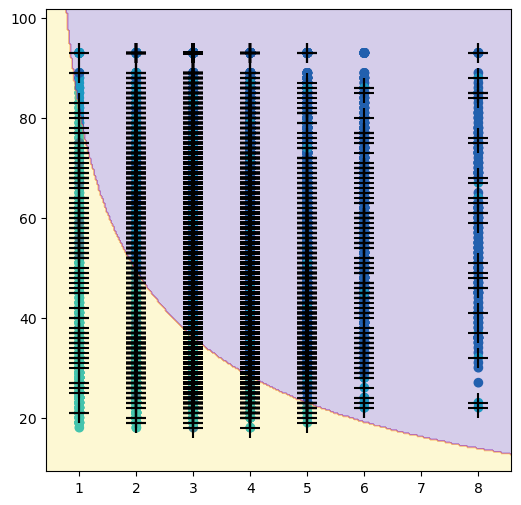

In [36]:

# top_features = df_importance_feature.iloc[:2]['Features'].tolist()
# svm_poly_best.fit(X_train[top_features], y_train)

# fig, ax = plt.subplots(figsize=(5, 5))
# plot_svm(X_train[top_features], y_train, svm_poly_best, ax=ax)
# plt.xlabel(top_features[0])
# plt.ylabel(top_features[1])
# plt.title('SVM Decision Boundary between Two Most Important Features')
# plt.show()


BEDROOMS = X_train.columns.get_loc('BEDROOMS')
AGE = X_train.columns.get_loc('AGE')
fig, ax = subplots(figsize=(6,6))
plot_svm(X_train,y_train,svm_poly_best,features=(BEDROOMS, AGE),ax=ax)